In [2]:
%pylab inline
plt.style.use("default")
import os, sys
import scipy
import helpers as h
import numpy.ma as ma
from glob import glob
from scipy.io import loadmat
from scipy.stats import skew, kurtosis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

plt.rcParams['figure.figsize'] = (15, 10) 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Load directory for data

In [9]:
data_root = "/Users/duuta/ppp/data/stringer/live_data/"
data_files = [fname.split("/")[-1] for fname in glob(f"{data_root}natimg2800_M*.mat")]

In [10]:
# Load data00 
data00_root = '/Users/duuta/ppp/data/data00/'
data00_files = [fname.split("/")[-1] for fname in glob(f"{data00_root}*spont_*.mat")]

In [11]:
len(data00_files)

13

In [12]:
plist = glob(f"{data00_root}*spont_*.mat")

In [13]:
data0 = loadmat(plist[0], simplify_cells=True)

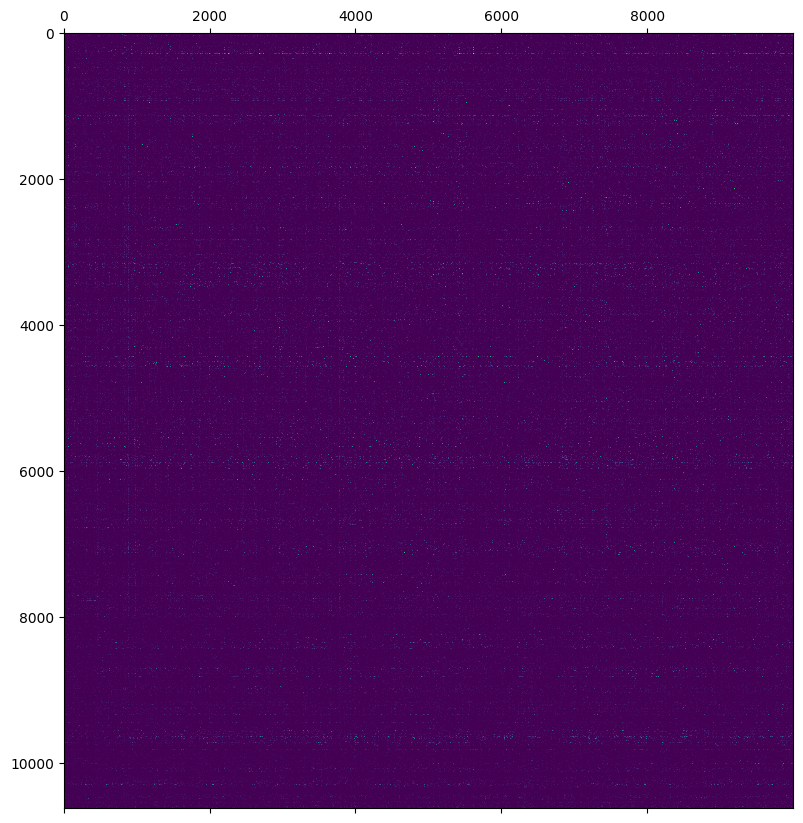

In [14]:
matshow(data0['Fsp'][1000:, :10000])

In [155]:
plist[0]

'/Users/duuta/ppp/data/data00/spont_M160825_MP027_2016-12-12.mat'

# Load data

In [64]:
mu_, std_ =0, 0
mus_, stds_ =0, 0

for num in range(6):
    data = loadmat(os.path.join(data_root, data_files[num])
                   ,simplify_cells = True) 
    resp = data['stim']['resp']
    spont = data['stim']['spont']
    mu_ += mean(resp)
    std_ += std(resp)
    mus_ += mean(spont)
    stds_ += std(spont)
    
print(f"mean {mu_/7}")
print(f" std {std_/7}")

print(f'mus_ {mus_/7}')
print(f'stds_ {stds_/7}')

mean 27.68970435006278
 std 75.24086325509208
mus_ 20.548564638410294
stds_ 59.08610044206892


In [67]:
spont
spont0 = spont.copy()

# gen 1000 across 10000 recordings, with half labl 1, and half labl 0


In [3]:
mu = 27.68 
sigma = 75.240
X = sigma*randn(1000, 10000) + mu
X[:500, ] +=10.5  # stepsize q
y = arange(1000) < 500

In [11]:
abib_pipeline = LDA()
abib_pipeline.fit(X, y).score(X, y)
# performance is a function of stepsize

0.786

In [4]:
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# gen 10000 rows of 4 features 

In [9]:
half = 5000
X0 = randn(10000, 4)
X0[half:, ]  -= 0 
y0  = arange(10000) < half

In [204]:
abib_pipeline.fit(X0, y0).score(X0, y0)

0.993

In [29]:
data['stim']['spont'].shape[0]

280

In [30]:
551103/280

1968.225

In [17]:
_filter = data['stim']['spont']>14.2575

In [169]:
data['stim']['spont'][:100, ] >  14.25

array([[False, False,  True, ..., False,  True,  True],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False]])

In [100]:
yy = ma.masked_array(spont, mask=_filter, fill_value=0)

In [105]:
yy.data.shape

(280, 10079)

In [43]:
a = np.arange(12).reshape((3, 4))
print(a[:, np.any(a < 2, axis = 0)])

[[0 1]
 [4 5]
 [8 9]]


In [42]:
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [94]:
xx=spont0[:, np.any(spont0 < 14.2575, axis = 0)]
xy=spont0[:, np.any(spont0 > 14.2575, axis = 0)]


 ...]

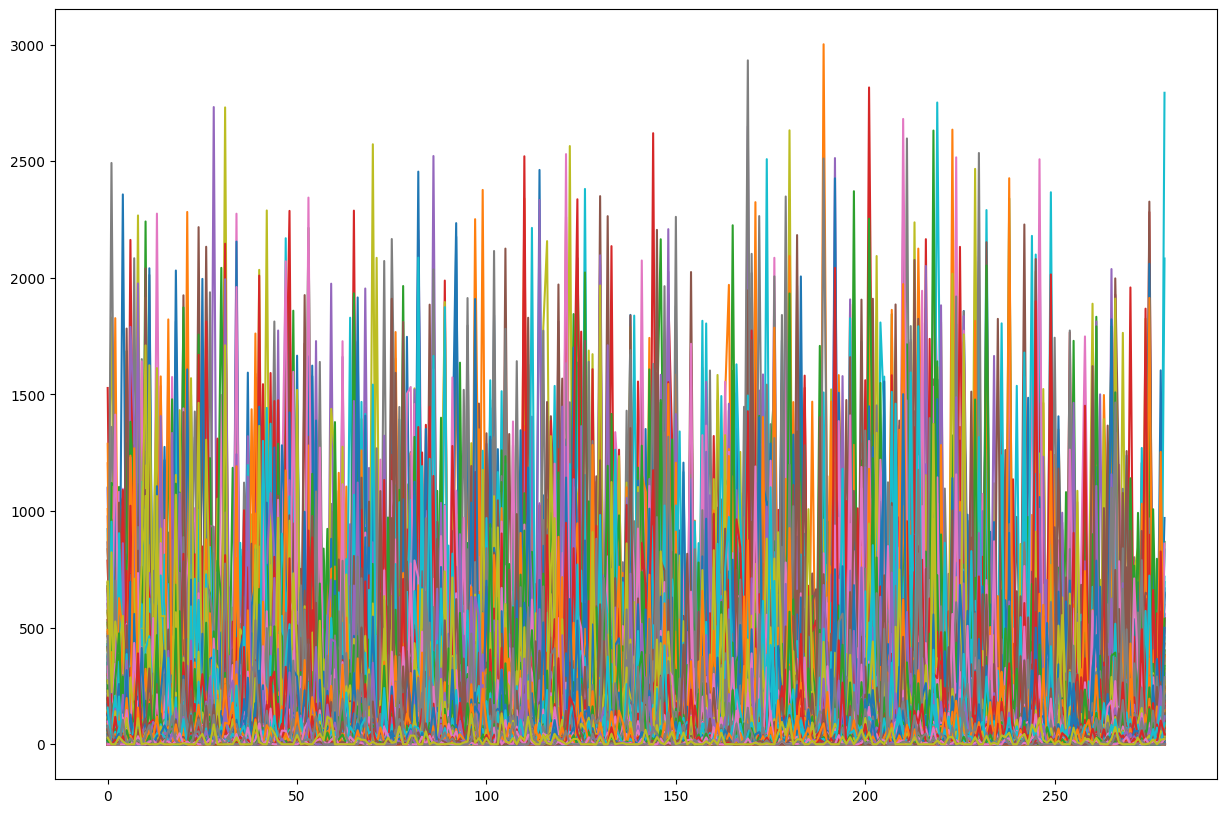

In [95]:
plot(xx)

 ...]

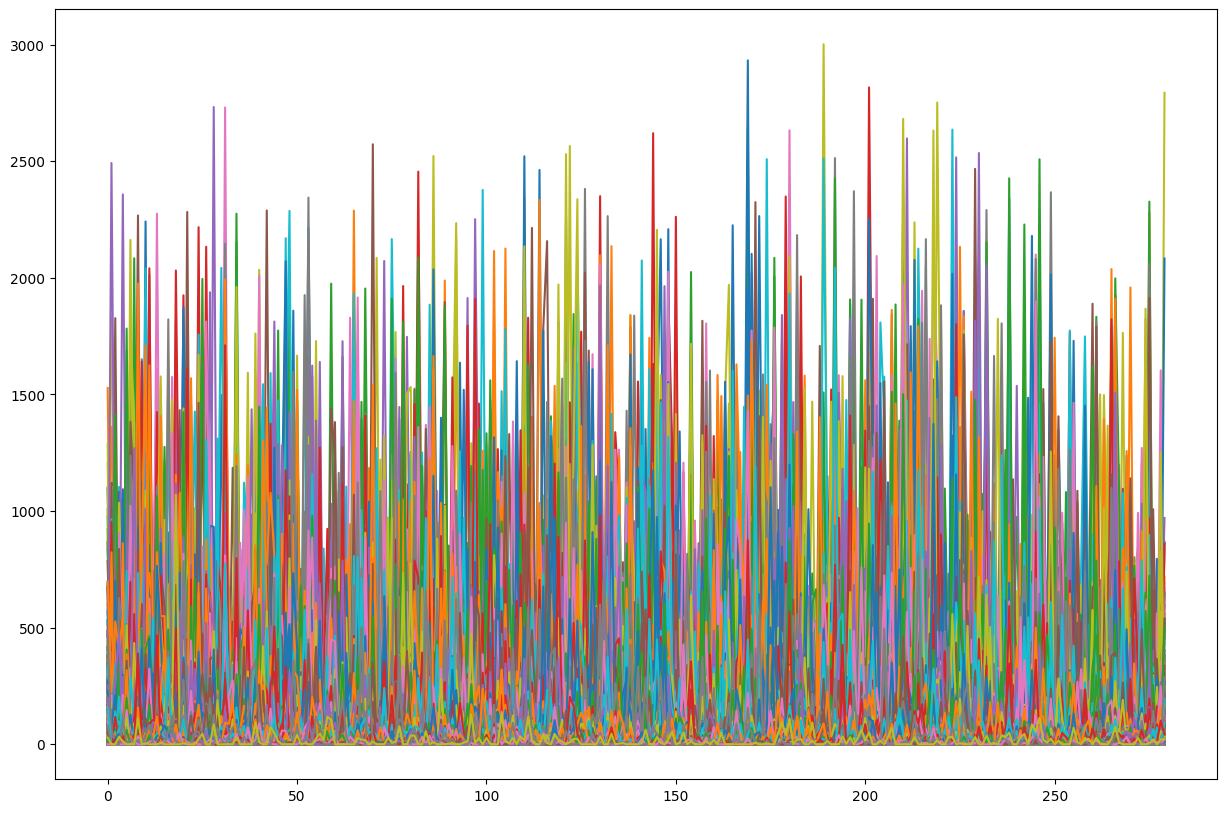

In [96]:
plot(xy)

 ...]

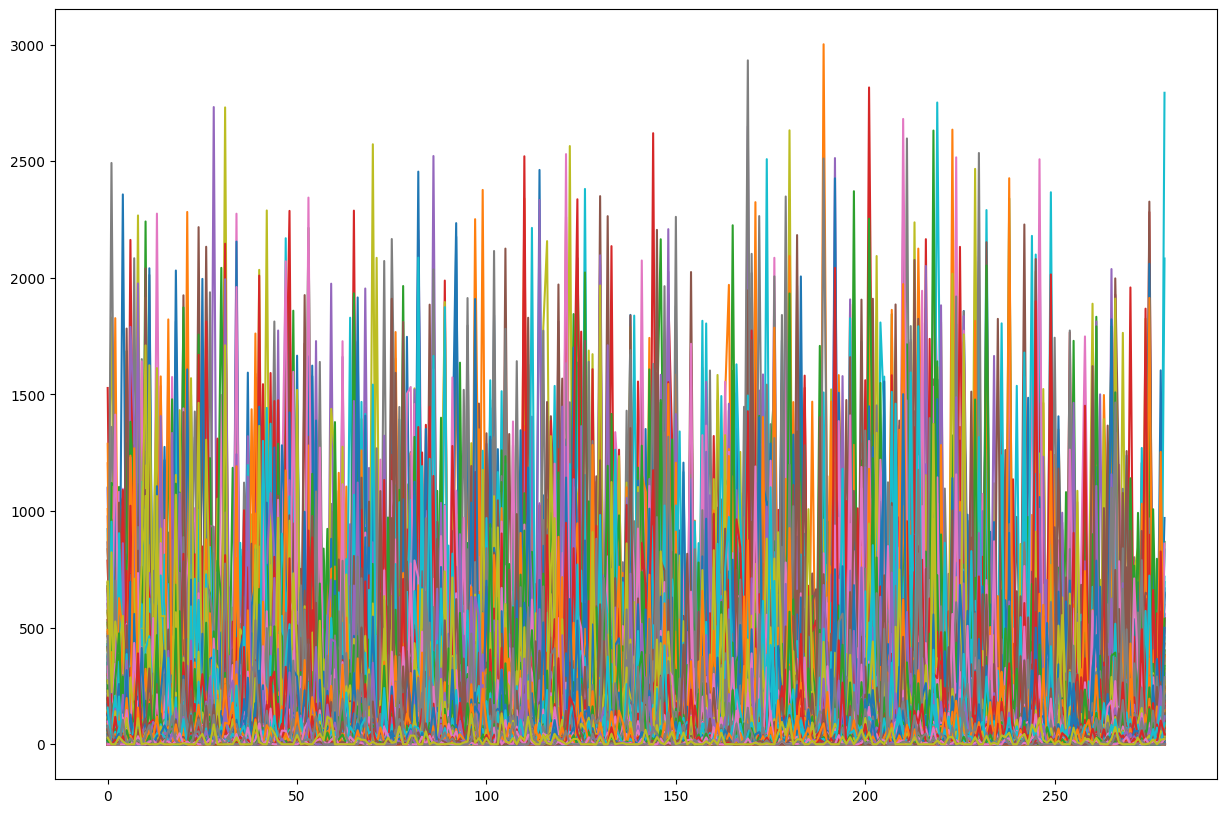

In [91]:
plot(spont)

In [79]:
spont

array([[ 0.       , 11.000434 , 29.482    , ...,  0.       , 79.413506 ,
        28.691008 ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       , 23.426998 ,  1.2886266, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [14.55518  ,  0.       ,  0.       , ...,  8.485556 ,  0.       ,
         0.       ],
       [35.456696 ,  0.       , 94.70582  , ...,  2.332087 ,  0.       ,
        19.108261 ],
       [ 0.       ,  1.9786874, 45.28274  , ..., 21.970524 ,  0.       ,
        22.94798  ]], dtype=float32)

In [50]:
_filter.shape

(280, 10079)

In [ ]:
print(a[:, np.all(a < 10, axis = 0)])

In [ ]:
arr[np.in1d(arr[:, 1], fltr)]

In [20]:
_filter.shape

(280, 10079)

In [25]:
_filter[_filter ==True].shape

(551103,)

In [29]:
# gen data with mean and sigma
mu = 27.68 
sigma = 75.240
X_list = []
    x = sigma*randn(1000, 10000) + mu
    x = x[:500, ] += 2.5
    X_list.append(x)
y = arange(1)

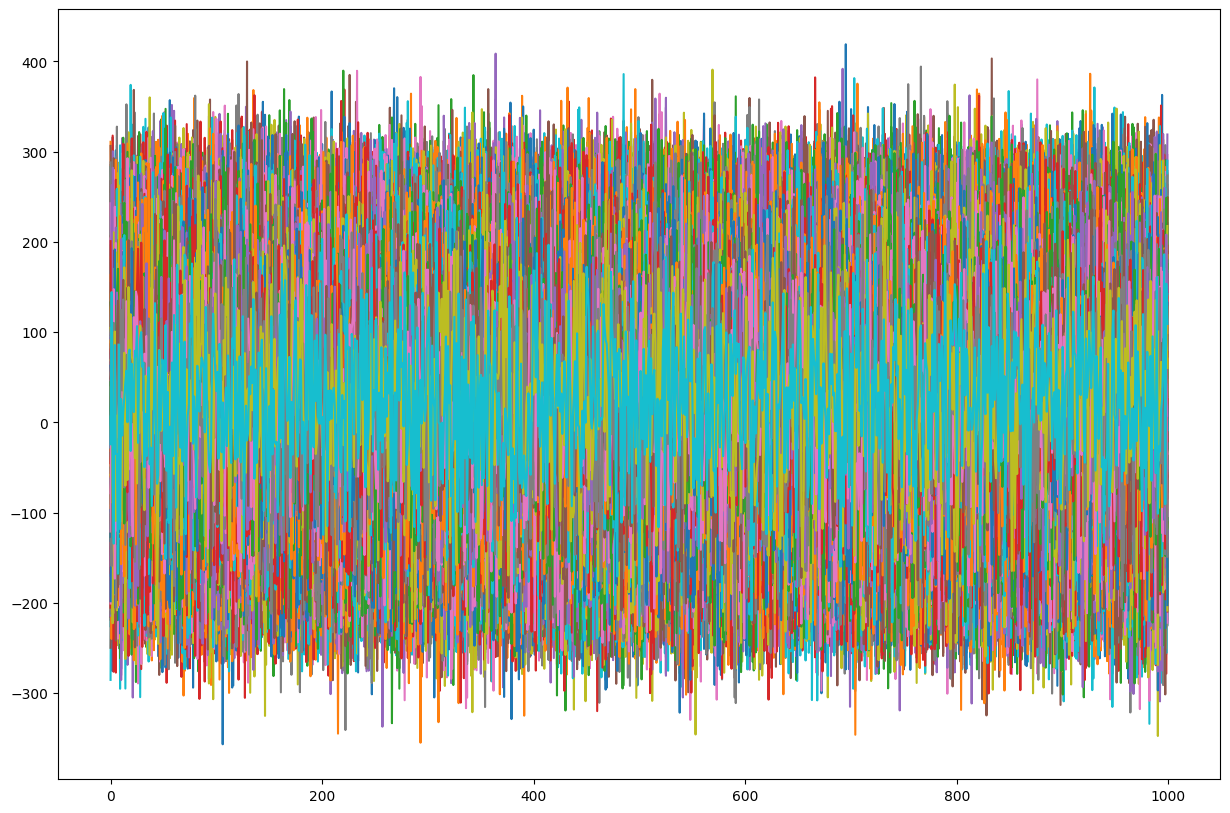

In [38]:
plot(sig_x[0]);

In [33]:
# random nosie (no signal)
mus =20.54
sgs = 59.09
rand_x = [] 
for i in range(0, 10):
    x_ = sgs* randn(1000, 10000) + mus
    rand_x.append(x_)

In [181]:
X = randn(100, 4); # 10 images 4 feats
y = arange(100) < 50 ;

In [185]:
print(y)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [182]:
#y[:y.size//2] += 5.55 

#X[:len(y)//2, 0] += 5.55 

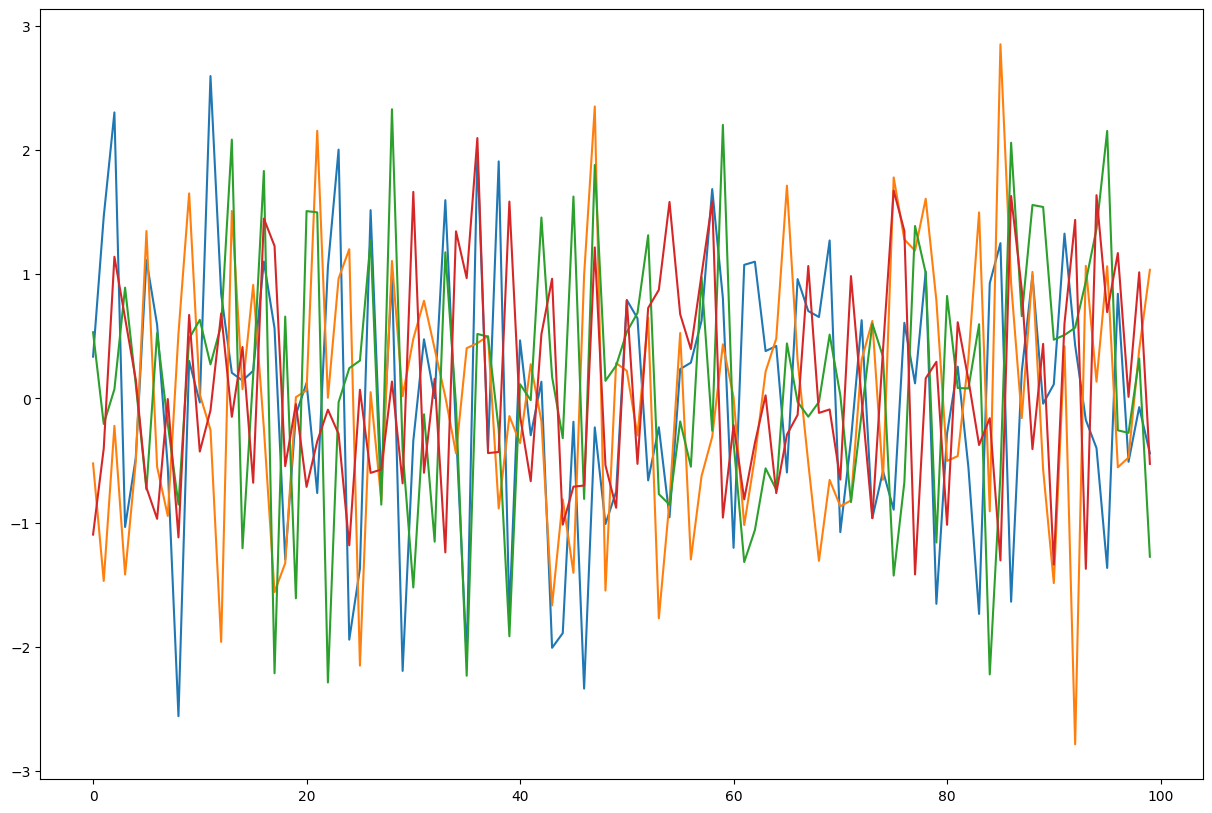

In [183]:
plot(X);

In [184]:
abib_pipeline.fit(X, y).score(X, y)

0.58

In [139]:
p = randn(1, 100).flatten()

In [142]:
p[:p.size//2] += 3.58584

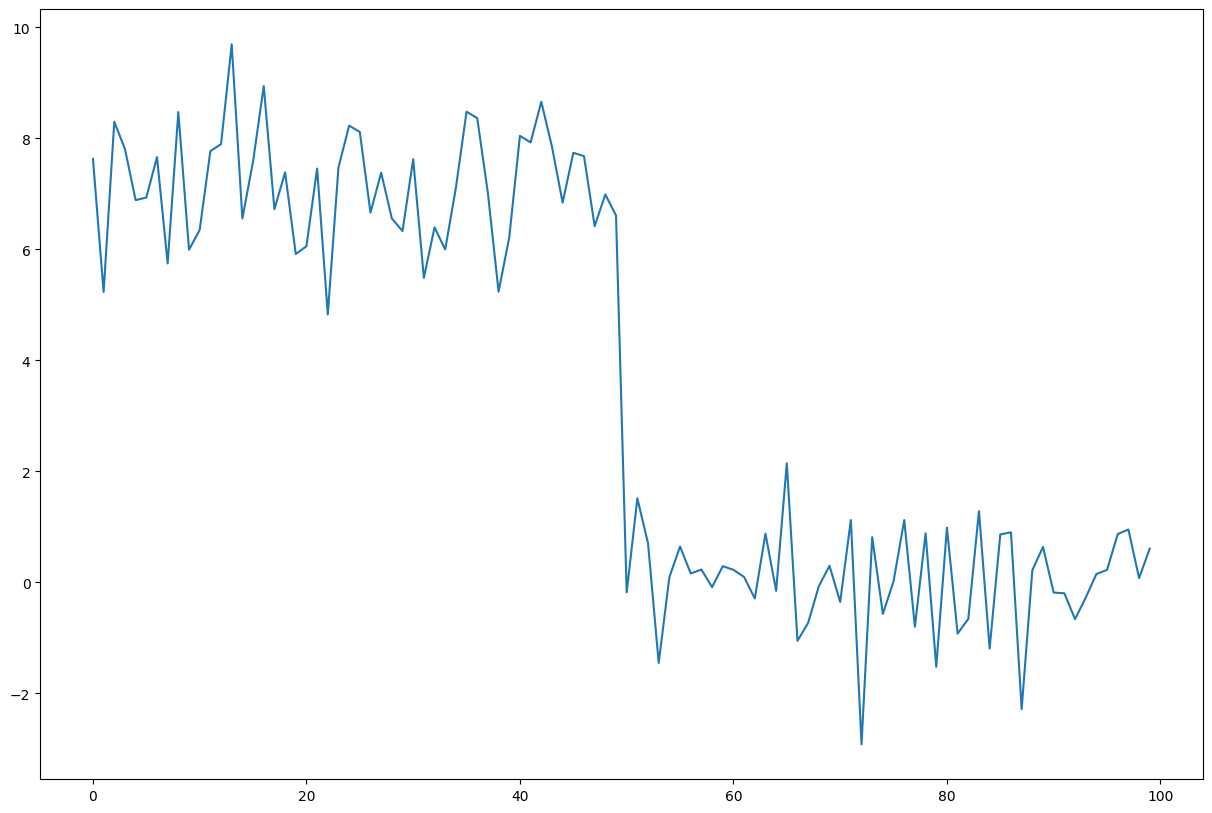

In [143]:
plot(p)

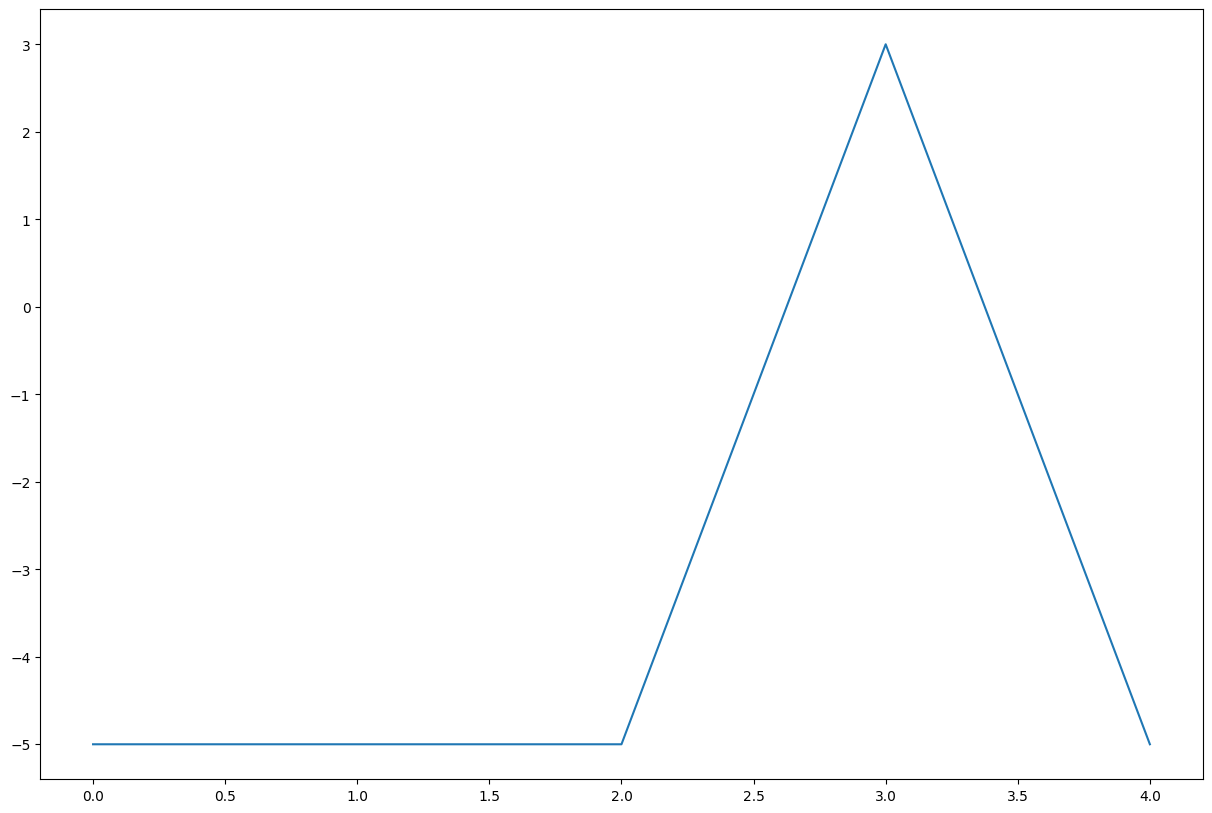

In [105]:
plot(a)

In [106]:
a

array([-5, -5, -5,  3, -5])

In [115]:
x, y, z = data['med'].T

In [116]:
x, y, z

(array([504, 360, 334, ..., 360, 430, 450], dtype=uint16),
 array([  8,  16,  18, ...,  24, 284, 334], dtype=uint16),
 array([ 70,  70,  70, ..., 420, 420, 420], dtype=uint16))

In [7]:
x.shape

NameError: name 'x' is not defined

In [170]:
X0.shape

(10000, 4)

In [185]:
np.histogram(X0)[1]

array([-4.14542081, -3.26660276, -2.3877847 , -1.50896664, -0.63014859,
        0.24866947,  1.12748752,  2.00630558,  2.88512364,  3.76394169,
        4.64275975])

In [184]:
np.histogram(X0)[1][-1]

4.642759747060613

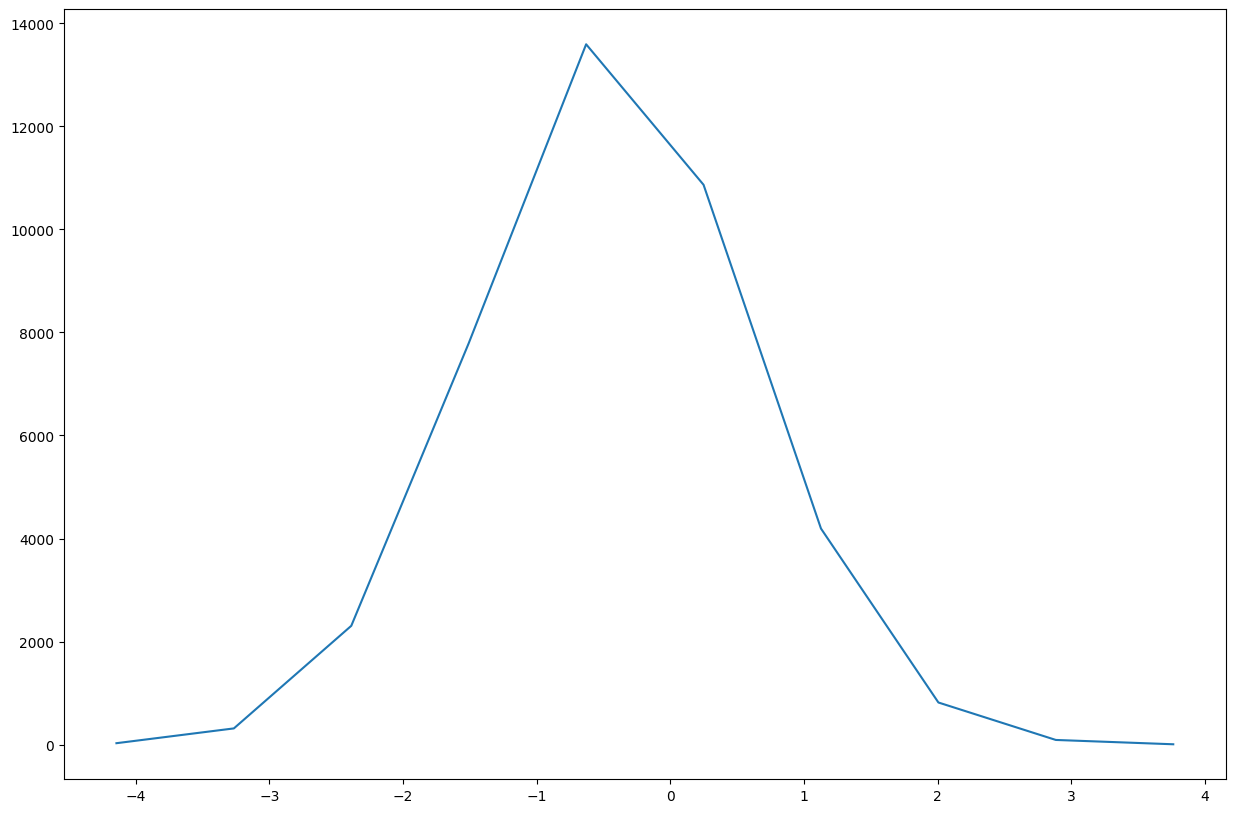

In [182]:
plt.plot(np.histogram(X0)[1][:-1], np.histogram(X0)[0])

In [189]:
srr = '/Users/duuta/ppp/data/data00/pickled/data_5.pickle'


In [199]:
import pickle

In [200]:
kk = open(srr, "rb")
data = pickle.load(kk)
kk.close()

In [201]:

def read_data(data):
    y0 = data["Fsp"]
    ymin = np.min(y0)
    ythres = ymin + 1234e-6
    y = np.clip(y0, ythres, np.inf)
    logy = np.log10(y)
    
    return y, logy

In [202]:
y, logy = read_data(data)

In [206]:
logy.shape

(11591, 16524)

In [239]:
skew(logy, axis=1).shape

(11591,)

In [260]:
centers = data['med']

In [4]:
c = 